In [6]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [7]:
import matplotlib.pyplot as plt

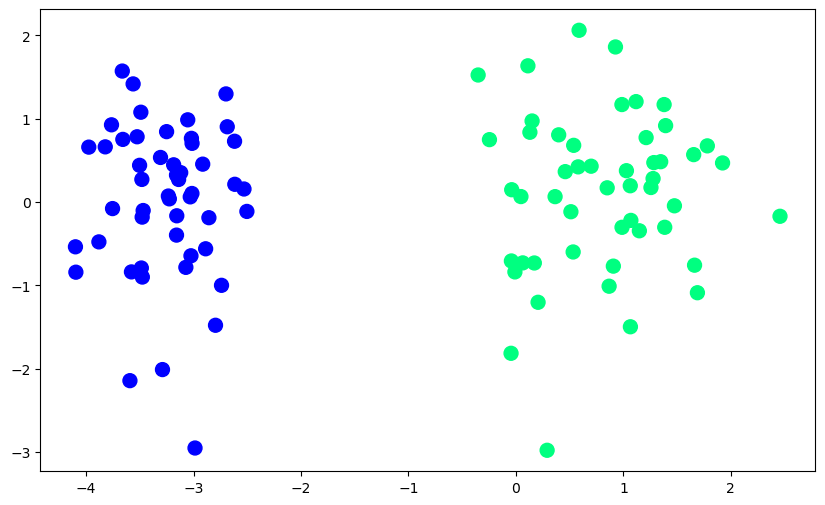

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [9]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [10]:
print(lor.coef_)
print(lor.intercept_)

[[4.85077902 0.21939114]]
[5.82063248]


In [11]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [12]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

(-3.0, 2.0)

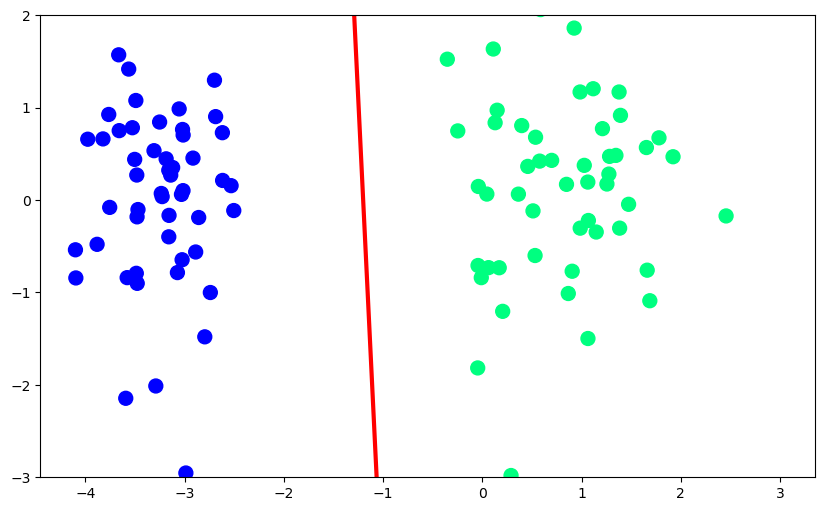

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=3,label='Sklearn')
plt.ylim(-3,2)

In [15]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    
    return weights[1:],weights[0]

In [17]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [18]:
coef,intercept = gd(X,y)

In [20]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [21]:
x_input_1 = np.linspace(-3,3,100)
y_input_1 = m1*x_input + b1

(-3.0, 2.0)

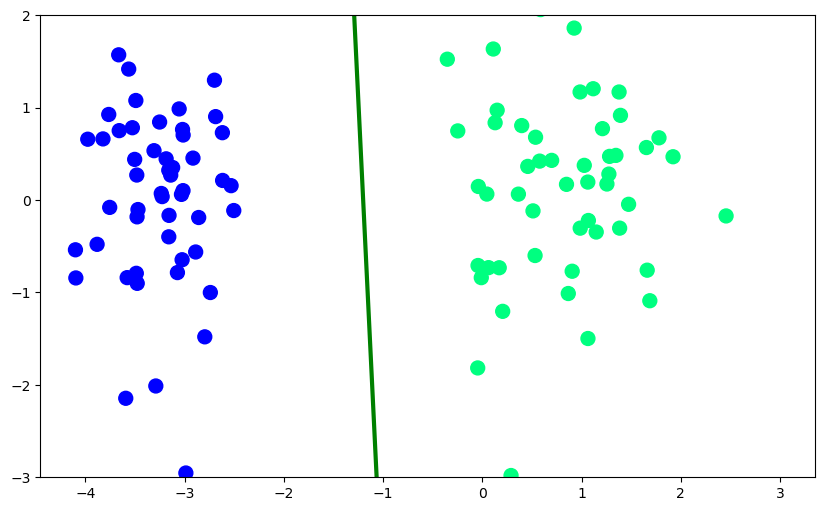

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# plt.plot(x_input,y_input,color='red',linewidth=3,label='Sklearn')
plt.plot(x_input_1,y_input_1,color='green',linewidth=3,label='Sklearn')
plt.ylim(-3,2)